# Clipping to Geographies of Interest

The goal of this notebook is to demonstrate how to GADM shapefiles to clip model output to specific geographies of interest.

First:

```
# download files from S3
wget https://jataware-world-modelers.s3.amazonaws.com/analytic-layers/gadm_0.zip
wget https://jataware-world-modelers.s3.amazonaws.com/analytic-layers/sample.tif

# unzip gadm
unzip gadm_0.zip

# remove zip files
rm *.zip
```

The above shell commands will download and unzip a GADM shape file for countries of the world along with a sample GeoTIFF file.


### Requirements
```
numpy==1.20.3
geopandas==0.9.0
rioxarray==0.7.1
matplotlib==3.4.2
```

In [4]:
%matplotlib inline

In [5]:
import numpy as np
import geopandas as gpd
import rioxarray as xr
import matplotlib.pyplot as plt

In [7]:
model_output = xr.open_rasterio("sample.tif", masked=True)
model_output = model_output.rio.write_crs(4326)

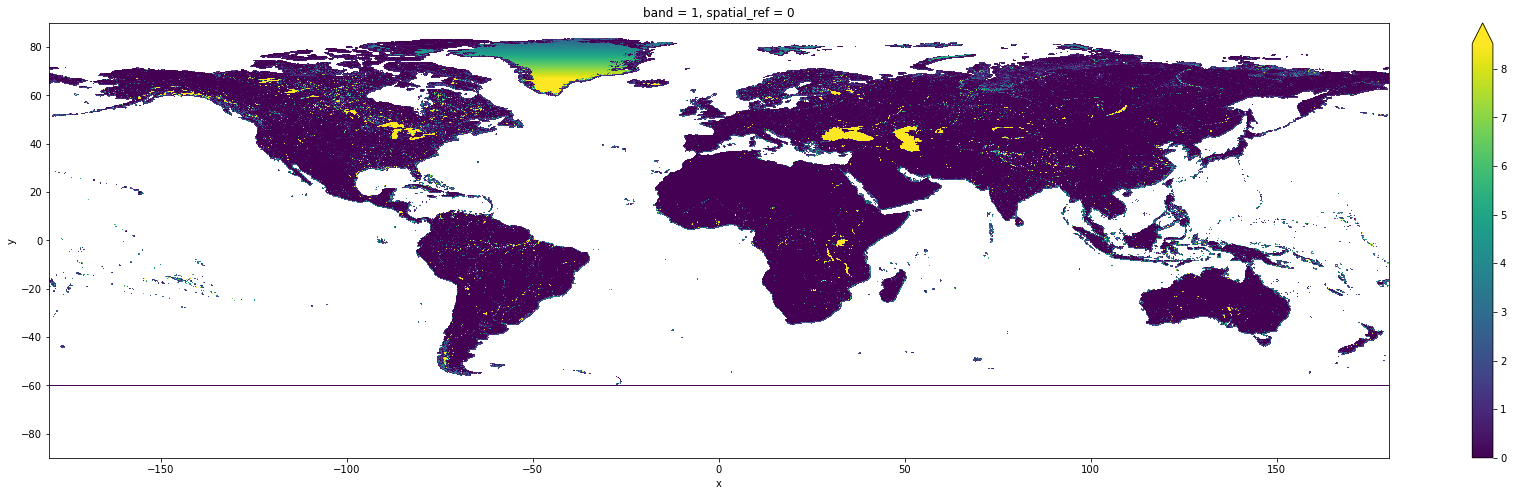

In [24]:
fig, axes = plt.subplots(ncols=1, figsize=(30, 8))
model_output.plot(robust=True)

In [10]:
shapefile = 'gadm_0/gadm36_0.shp'
sf = gpd.read_file(shapefile)

In [11]:
sf.head()

,GID_0,NAME_0,geometry
0,ABW,Aruba,"POLYGON ((-69.97820 12.46986, -69.97847 12.469..."
1,AFG,Afghanistan,"POLYGON ((68.52644 31.75435, 68.53852 31.75457..."
2,AGO,Angola,"MULTIPOLYGON (((11.73347 -16.67255, 11.73347 -..."
3,AIA,Anguilla,"MULTIPOLYGON (((-63.42375 18.58903, -63.42375 ..."
4,ALA,Åland,"MULTIPOLYGON (((21.32195 59.74986, 21.32195 59..."


## Select countries of interest

Here we can select one or more countries of interest. In this case, let's select Ethiopia, Kenya, South Sudan, and Somalia.

> Note: the country names must match the names used in GADM

In [12]:
countries = ['Ethiopia','South Sudan','Somalia','Kenya', 'Sudan', 'Eritrea', 'Somaliland', 
            'Djibouti','Uganda', 'Rwanda', 'Burundi', 'Tanzania']

In [13]:
countries_shp = sf[sf['NAME_0'].isin(countries)]

## Clip Model Output to Countries of Interest

In [14]:
model_output_c = model_output.rio.clip(countries_shp.geometry)

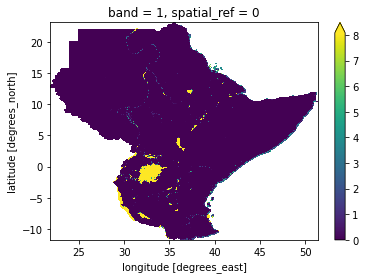

In [15]:
model_output_c.plot(robust=True)

We can plot the before and after side by side to visually inspect it:

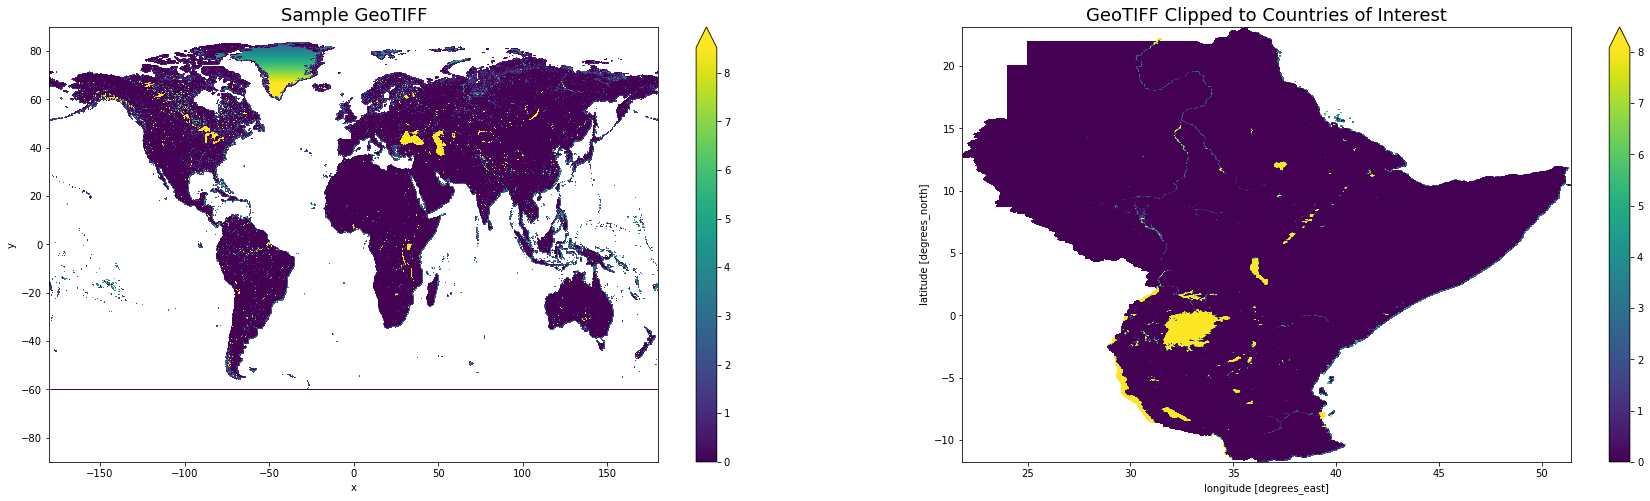

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(30, 8))


model_output\
    .plot(robust=True, ax=axes[0])
axes[0].set_title("Sample GeoTIFF", fontsize = 18)



model_output_c\
    .plot(robust=True, ax=axes[1])
axes[1].set_title("GeoTIFF Clipped to Countries of Interest", fontsize = 18)

print()

We can write the clipped model output back as a GeoTiff:

In [18]:
model_output_c.rio.to_raster("clipped.tif")